<a href="https://colab.research.google.com/github/leethanhvaan20302/desktop-tutorial/blob/main/BT4.%205Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***4. 5 kinds of flowers (rose, lotus, water lily, apricot, daisy, pink) ***

In [ ]:
# Import các thư viện cần thiết, bao gồm: Keras, numpy, matplotlib, và os.
from keras.models import Sequential, Model 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.utils import load_img
from keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from os import listdir
from numpy import asarray, save
import numpy as np
from numpy import asarray



# Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# Di chuyển tới thư mục xử lí
# %cd /content/drive/MyDrive/Fl Colab/5Flower
%cd /content/drive/.shortcut-targets-by-id/1NhRQmO7rlNlzZ_Vr21DbGxOmI-O5rk-Y/5Flower

/content/drive/.shortcut-targets-by-id/1NhRQmO7rlNlzZ_Vr21DbGxOmI-O5rk-Y/5Flower


In [ ]:
# Khởi tạo dữ liệu cho quá trình training và validation bằng cách sử dụng
"""Sử dụng lớp ImageDataGenerator để tiền xử lý dữ liệu ảnh. 
Hàm rescale=1./255 giúp chia giá trị của các pixel trong ảnh cho 255 để đưa giá trị về khoảng [0,1]. shear_range, zoom_range 
và horizontal_flip là các thuộc tính khác của lớp ImageDataGenerator giúp tăng tính đa dạng của dữ liệu.

Khởi tạo training data và validation data bằng phương thức flow_from_directory của lớp ImageDataGenerator. 
Tham số target_size là kích thước của ảnh sau khi được resize về cùng kích thước, 
batch_size là số lượng ảnh được truyền vào mô hình mỗi lần tính toán,
và class_mode='categorical' là chế độ phân loại đa lớp cho mô hình."""

train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training = train_datagen.flow_from_directory('/content/drive/MyDrive/Fl Colab/5Flower/train',target_size = (150,150), batch_size = 32,class_mode='categorical')
validation=train_data.flow_from_directory('/content/drive/MyDrive/Fl Colab/5Flower/valid',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 2384 images belonging to 5 classes.
Found 610 images belonging to 5 classes.


In [ ]:
# Kiểm tra các thuộc tính của tập dữ liệu training
training.class_indices
     
# Kiểm tra các thuộc tính của tập dữ liệu validation
validation.class_indices

{'daisy': 0, 'lotus': 1, 'rose': 2, 'sunflower': 3, 'water lily': 4}

In [ ]:
# Tạo ra mạng CNN để train mô hình
"""Tạo model CNN bằng cách sử dụng lớp Conv2D để thêm các layer convolution, lớp MaxPooling2D để giảm chiều của ảnh,
 lớp Flatten để chuyển đổi dữ liệu ảnh thành một vector 1D, lớp Dense để thêm các layer fully connected, và lớp Dropout để tránh overfitting."""
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:

# Biên dịch 
model.compile(
    optimizer = 'Adam',
    loss='categorical_crossentropy',
    metrics = 'accuracy'
)
model.summary()
# Tiến hành quá trình training
train = model.fit(training,epochs = 30,validation_data=validation,verbose = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

Train Loss 0.09975231438875198
Train Accuracy 0.968120813369751


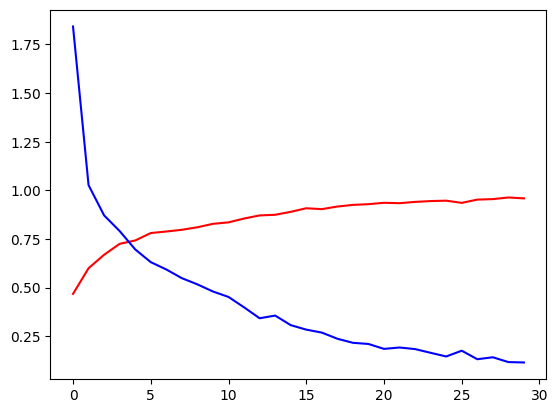

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot( epochs, accuracy, 'r', label = 'Training accuracy')
plt.plot( epochs, loss, 'b', label = 'Training loss')

In [ ]:
# Lưu 
from google.colab import drive
model.save('/content/drive/MyDrive/Fl Colab/Save ModelS/5Flower.h5')

In [ ]:

# Load model vừa lưu
from tensorflow.keras.models import load_model
model_1=load_model('/content/drive/MyDrive/Fl Colab/Save ModelS/5Flower.h5')

1/1 [==============================] - 0s 32ms/step
Water Lily


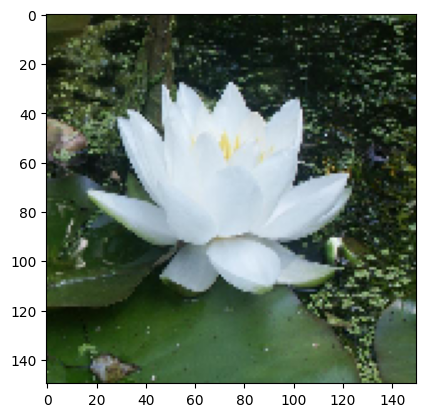

1/1 [==============================] - 0s 26ms/step
Sunflower


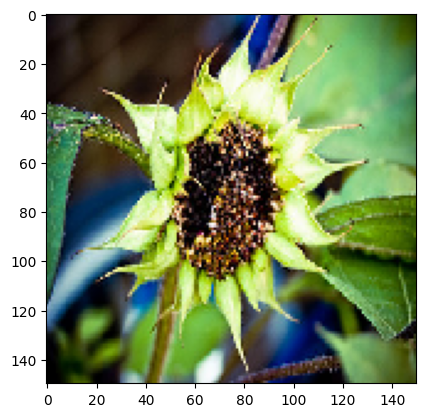

1/1 [==============================] - 0s 33ms/step
Daisy


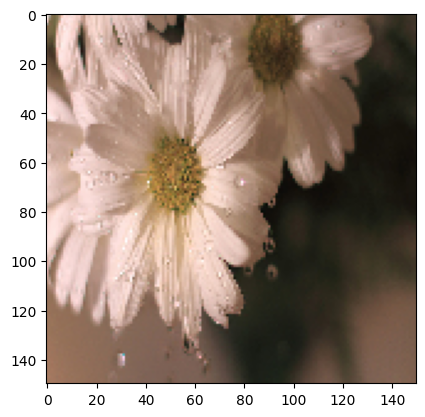

1/1 [==============================] - 0s 18ms/step
Rose


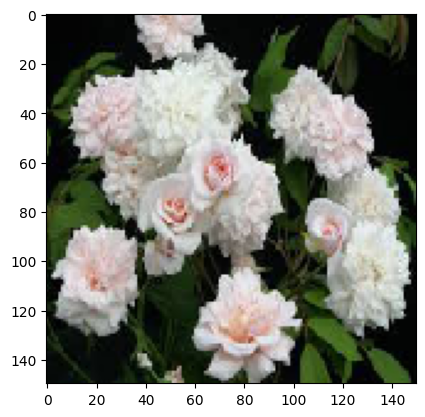

1/1 [==============================] - 0s 22ms/step
Rose


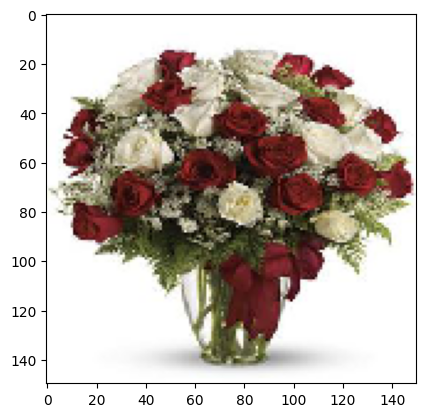

1/1 [==============================] - 0s 26ms/step
Rose


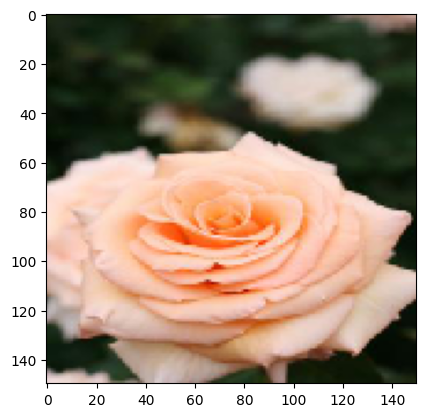

1/1 [==============================] - 0s 18ms/step
Lotus


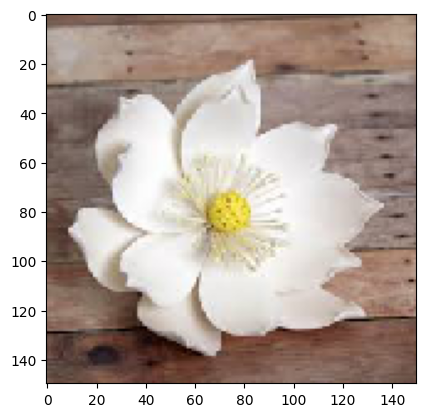

1/1 [==============================] - 0s 22ms/step
Water Lily


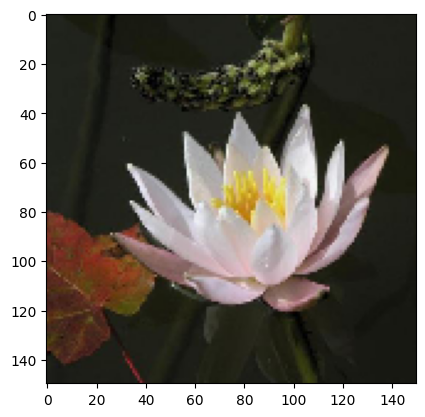

1/1 [==============================] - 0s 21ms/step
Sunflower


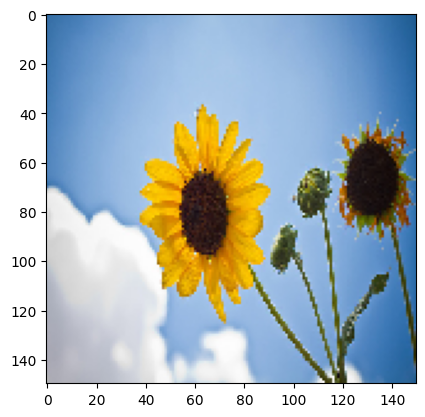

1/1 [==============================] - 0s 19ms/step
Lotus


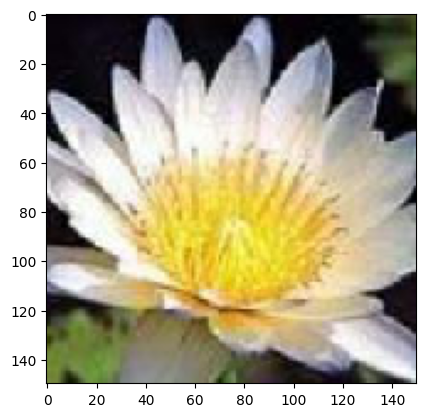

1/1 [==============================] - 0s 20ms/step
Daisy


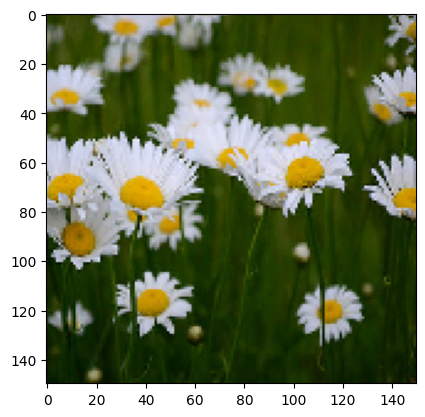

In [ ]:
# Sử dụng model để dự đoán trên ảnh mới
test="/content/drive/MyDrive/Fl Colab/5Flower/test"

for i in listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Daisy','Lotus','Rose','Sunflower','Water Lily']
  print(class_name[result])
  plt.show()